# Advertising Data Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adv = pd.read_csv("../datasets/advertising.csv")

In [3]:
adv.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [4]:
adv.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [5]:
adv["Clicked on Ad"].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

**Its a balanced dataset**

In [6]:
len(adv["Ad Topic Line"].unique())

1000

In [7]:
len(adv.Country.unique())

237

In [8]:
len(adv.Timestamp.unique())

1000

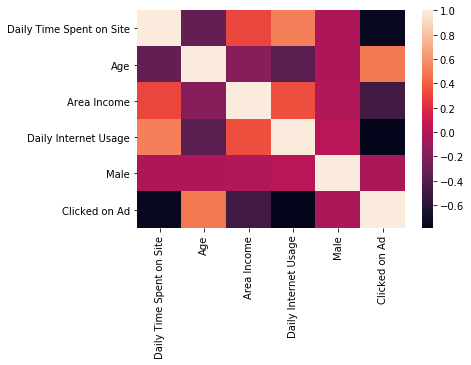

In [9]:
sns.heatmap(adv.corr())

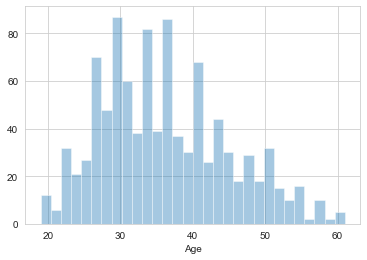

In [10]:
sns.set_style("whitegrid")
sns.distplot(adv.Age,bins=30,kde=False)

In [11]:
adv["Date"] = pd.Series([i.split()[0] for i in adv.Timestamp])
adv["Time"] = pd.Series([i.split()[1] for i in adv.Timestamp])

In [12]:
adv.drop("Timestamp",axis=1,inplace=True)

In [13]:
adv.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

   Clicked on Ad        Date      Time  
0              0  2016-03-27  00:53:11  
1              0  2016-04-04  01:39:02  
2              0  2016-03-13  20:35:42  
3              0  2016-01-10  02:31:19  
4              0  2016-06-03  03:36:18

In [14]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Clicked on Ad             1000 non-null   int64  
 9   Date                      1000 non-null   object 
 10  Time                      1000 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 86.1+ KB


In [15]:
# Ad topic Line isunique everywher, it doesn't contribute to the analysis.
adv.drop("Ad Topic Line",axis=1,inplace=True)

In [16]:
# Converting Time to 0 (8am to 8pm) or 1 (night)
adv["Time"] = adv.Time.map(lambda x: 0 if 8 < int(x.split(':')[0]) <= 20 else 1)

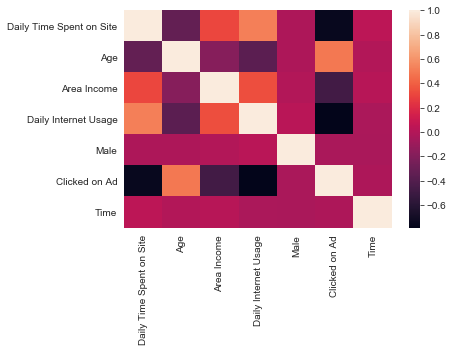

In [17]:
sns.heatmap(adv.corr())

In [18]:
adv.Time.value_counts()

1    512
0    488
Name: Time, dtype: int64

In [19]:
adv.drop(["Date","City","Country"],axis=1,inplace=True)

In [20]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   Time                      1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [22]:
LR = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(adv.drop('Clicked on Ad',axis=1), adv['Clicked on Ad'],test_size=0.2, random_state=5)
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [23]:
accuracy_score(y_test,y_pred)

0.915

In [24]:
confusion_matrix(y_test,y_pred)

array([[94,  5],
       [12, 89]], dtype=int64)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        99
           1       0.95      0.88      0.91       101

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200



# KNN Classification

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score

In [27]:
test_accuracy = []

for k in range(1,20):
    print("K = ",k)
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train,y_train)
    print("Train Confusion Matrix: ")
    print(confusion_matrix(y_train,neigh.predict(x_train)))
    print("Test confusion Matrix: ")
    print(confusion_matrix(y_test,neigh.predict(x_test)))
    print(accuracy_score(y_test,neigh.predict(x_test)))
    print("*"*50)
    test_accuracy.append(accuracy_score(y_test,neigh.predict(x_test)))

K =  1
Train Confusion Matrix: 
[[401   0]
 [  0 399]]
Test confusion Matrix: 
[[80 19]
 [22 79]]
0.795
**************************************************
K =  2
Train Confusion Matrix: 
[[401   0]
 [ 97 302]]
Test confusion Matrix: 
[[93  6]
 [48 53]]
0.73
**************************************************
K =  3
Train Confusion Matrix: 
[[361  40]
 [ 67 332]]
Test confusion Matrix: 
[[70 29]
 [40 61]]
0.655
**************************************************
K =  4
Train Confusion Matrix: 
[[373  28]
 [109 290]]
Test confusion Matrix: 
[[80 19]
 [48 53]]
0.665
**************************************************
K =  5
Train Confusion Matrix: 
[[344  57]
 [ 82 317]]
Test confusion Matrix: 
[[71 28]
 [38 63]]
0.67
**************************************************
K =  6
Train Confusion Matrix: 
[[364  37]
 [133 266]]
Test confusion Matrix: 
[[78 21]
 [46 55]]
0.665
**************************************************
K =  7
Train Confusion Matrix: 
[[344  57]
 [102 297]]
Test confusion Ma

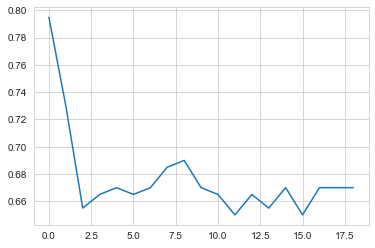

In [28]:
plt.plot(test_accuracy)

In [29]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train, y_train)
print("Test Confusion Matrix")
print(confusion_matrix(y_test, neigh.predict(x_test)))
print(accuracy_score(y_test,neigh.predict(x_test)))

Test Confusion Matrix
[[93  6]
 [48 53]]
0.73


# SVM

In [30]:
from sklearn.svm import SVC
#from sklearn.metrics import 

In [31]:
x_train,x_test,y_train,y_test = train_test_split(adv.drop('Clicked on Ad',axis = 1),adv["Clicked on Ad"],test_size=0.2,random_state=5)

In [32]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(800, 6) (200, 6)
(800,) (200,)


In [33]:
model1 = SVC(C=1,kernel='linear',gamma = 0.001) 

In [34]:
model1.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
accuracy_score(y_test,model1.predict(x_test))

0.96

In [36]:
model2 = SVC(C=1,kernel='poly', degree = 2,gamma = 0.001)

In [ ]:
model2.fit(x_train,y_train)

In [ ]:
accuracy_score(y_test,model1.predict(x_test))